<a href="https://colab.research.google.com/github/pchotia/Hotel-booking/blob/main/Pranshu_Chotia_Project_on_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()



In [3]:
df=pd.read_csv('/content/drive/MyDrive/Copy of Hotel Bookings.csv')
df


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


So at first we will try to get the whole information of the above given data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

So by using info() we get the whole information of the given data, now we can move further.


  

***How many types of hotels are their and which type of hotels were prefered by the customers?***

In [5]:
number_of_hotels = df.hotel.value_counts()
number_of_hotels

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Text(0.5, 0, 'Types of Hotel')

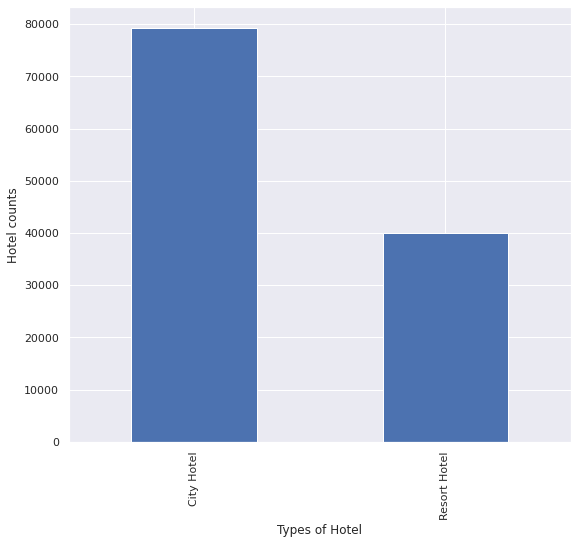

In [6]:
plt.figure(figsize=(9,8))
number_of_hotels.plot(kind='bar')
plt.ylabel('Hotel counts')
plt.xlabel('Types of Hotel')

By this we came to know that there are two types of hotels mentioned in the data and customers prefered "City Hotels" more than "Resort Hotel"

***Find out the maximum and the least booking months of hotels.***

In [7]:
booking_months=df.arrival_date_month.value_counts()
booking_months

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

Text(0.5, 0, 'Booking Months')

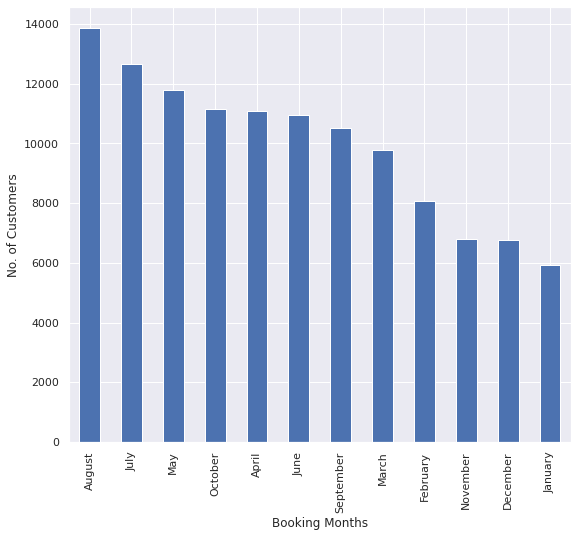

In [8]:
plt.figure(figsize=(9,8))
booking_months.plot(kind='bar')
plt.ylabel('No. of Customers')
plt.xlabel('Booking Months')

By this graph we came to know that August is the month in which the highest booking were done, and January is the month in which the lowest booking were done.

***Which type of room were prefered by the customers?***

In [9]:
room_type= df.reserved_room_type.value_counts()
room_type_dict = dict(room_type)
print(room_type_dict)

{'A': 85994, 'D': 19201, 'E': 6535, 'F': 2897, 'G': 2094, 'B': 1118, 'C': 932, 'H': 601, 'P': 12, 'L': 6}


Text(0.5, 0, 'Room prefered')

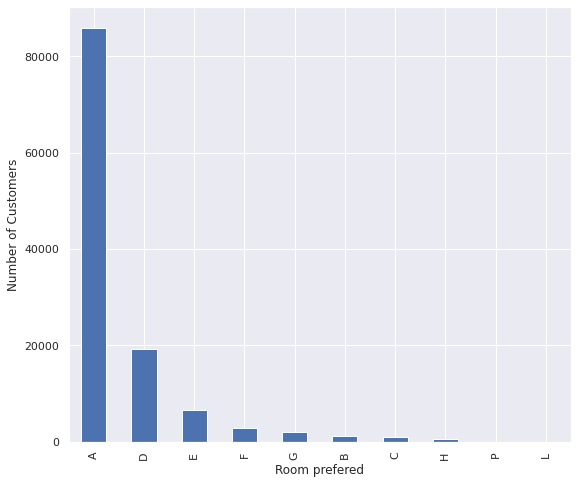

In [10]:
plt.figure(figsize=(9,8))
room_type.plot(kind="bar")
plt.ylabel('Number of Customers')
plt.xlabel('Room prefered')

By the above operations we came to know that Type'A' room is prefered by most of the customers.

***Find out how many booking were done by the customers directly or done through agents.***

In [11]:
booking_done_by = df.distribution_channel.value_counts()
booking_done_by_dict = dict(booking_done_by)
print(booking_done_by_dict)

{'TA/TO': 97870, 'Direct': 14645, 'Corporate': 6677, 'GDS': 193, 'Undefined': 5}


Text(0.5, 0, 'Booking done by')

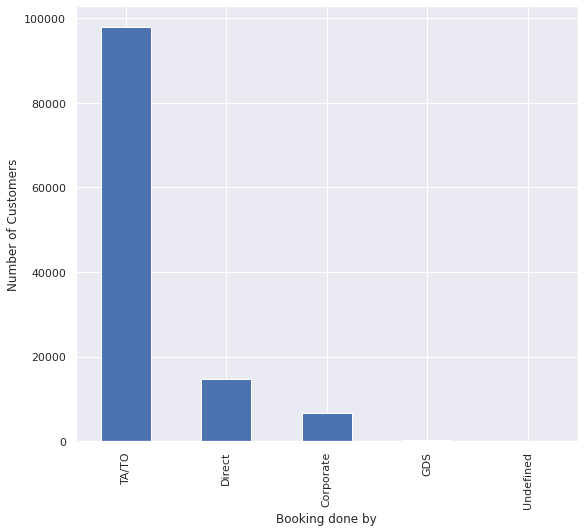

In [12]:
plt.figure(figsize=(9,8))
booking_done_by.plot(kind='bar')
plt.ylabel('Number of Customers')
plt.xlabel('Booking done by')

By this we came to know that most of the customers book their hotel room through TA/TO.

***Which type of customers are there in the given data?***

In [13]:
types_of_customers = df.customer_type.value_counts()
types_of_customers

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

Text(0.5, 0, 'Customer Type')

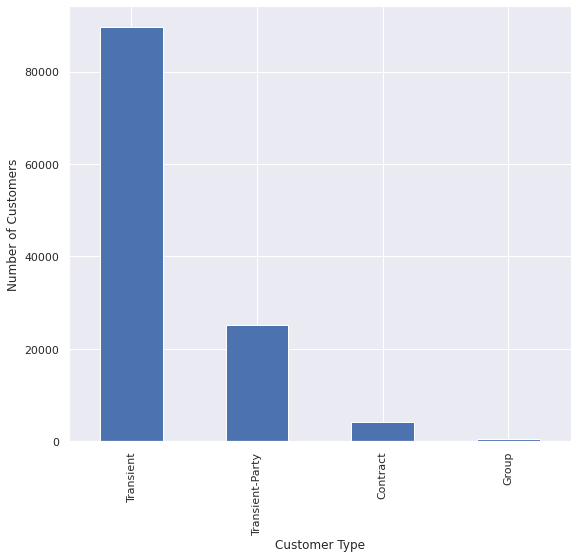

In [14]:
plt.figure(figsize=(9,8))
types_of_customers.plot(kind='bar')
plt.ylabel('Number of Customers')
plt.xlabel('Customer Type')


By the above operation we came to know that there are four types of customers and the Transient customers are the most to book hotel 

***Which date has the maximum number of customers?***

In [15]:
date_with_max_customers = df.arrival_date_day_of_month.value_counts() 
date_with_max_customers

17    4406
5     4317
15    4196
25    4160
26    4147
9     4096
12    4087
16    4078
2     4055
19    4052
20    4032
18    4002
24    3993
28    3946
8     3921
3     3855
30    3853
6     3833
14    3819
27    3802
21    3767
4     3763
13    3745
7     3665
1     3626
23    3616
11    3599
22    3596
29    3580
10    3575
31    2208
Name: arrival_date_day_of_month, dtype: int64

Text(0.5, 0, 'Date')

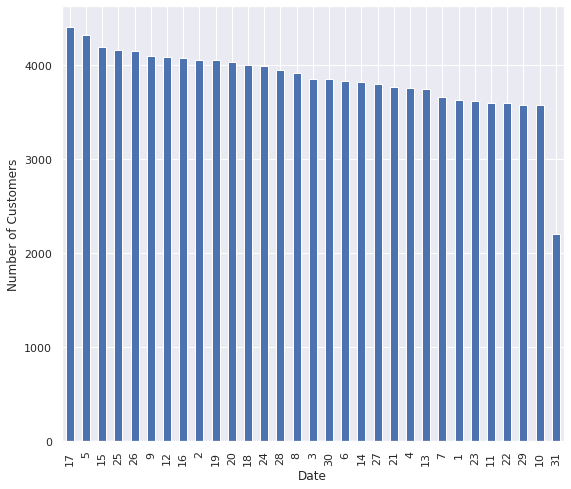

In [16]:
plt.figure(figsize=(9,8))
date_with_max_customers.plot(kind='bar')
plt.ylabel('Number of Customers')
plt.xlabel('Date')


By this we get an idea that on which date the maximum customers arrives in hotel.

***Find out the number of adults and chidren from the given data.***

In [17]:
total_number = df[['adults','children']].value_counts()
total_number

adults  children
2       0.0         82278
1       0.0         22587
3       0.0          5675
2       1.0          4089
        2.0          3248
3       1.0           487
1       1.0           279
0       2.0           208
        0.0           180
1       2.0           157
2       3.0            61
4       0.0            60
3       2.0            39
0       3.0            11
26      0.0             5
1       3.0             4
0       1.0             4
20      0.0             2
27      0.0             2
5       0.0             2
4       1.0             2
10      0.0             1
6       0.0             1
2       10.0            1
40      0.0             1
50      0.0             1
55      0.0             1
dtype: int64

Text(0.5, 0, 'Number of Adults and Children')

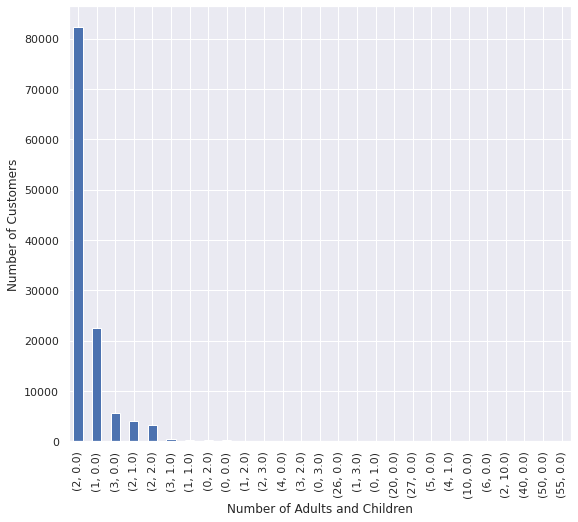

In [18]:
plt.figure(figsize=(9,8))
total_number.plot(kind = 'bar')
plt.ylabel('Number of Customers')
plt.xlabel('Number of Adults and Children')


By this we came to know that numbers of adults and chidren in the hotel.

***Find out that which type of customers have special requests.***

In [19]:
special_request = df[['total_of_special_requests', 'customer_type']].value_counts()
special_request

total_of_special_requests  customer_type  
0                          Transient          49331
1                          Transient          26777
0                          Transient-Party    18567
2                          Transient          11052
1                          Transient-Party     5151
3                          Transient           2124
0                          Contract            2106
2                          Transient-Party     1138
1                          Contract            1121
2                          Contract             711
0                          Group                314
4                          Transient            300
3                          Transient-Party      231
1                          Group                177
3                          Contract             128
2                          Group                 68
4                          Transient-Party       31
5                          Transient             29
3                    

Text(0.5, 0, 'Customers with special request')

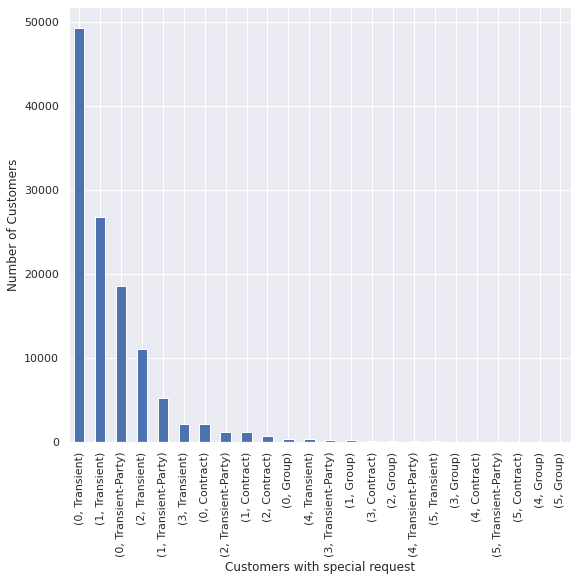

In [20]:
plt.figure(figsize=(9,8))
special_request.plot(kind= 'bar')
plt.ylabel('Number of Customers')
plt.xlabel('Customers with special request')


From above bar graph we came to know that which customers have special request.

***Find out from which segment how many customers beolngs to.***

In [21]:
market = df.market_segment.value_counts()
market

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

Text(0.5, 0, 'Market Segment')

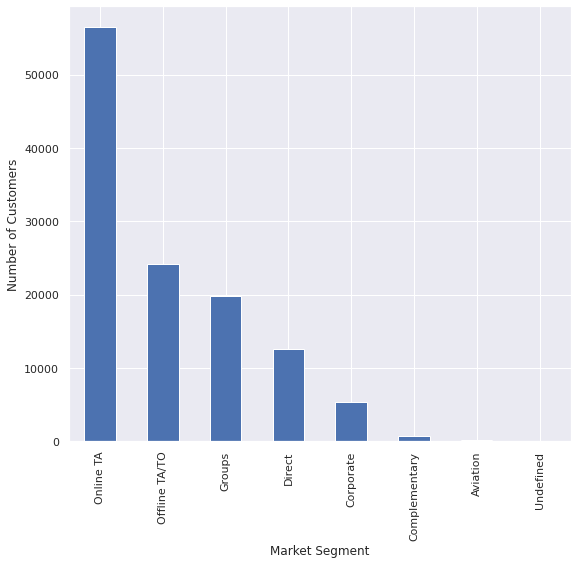

In [22]:
plt.figure(figsize=(9,8))
market.plot(kind='bar')
plt.ylabel('Number of Customers')
plt.xlabel('Market Segment')

Here we came to know that from Onine TA most of the customer belongs to.

***Find out the deposit status by the customers.***

In [23]:
deposit = df.deposit_type.value_counts()
deposit

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

Text(0.5, 0, 'Deposit Type')

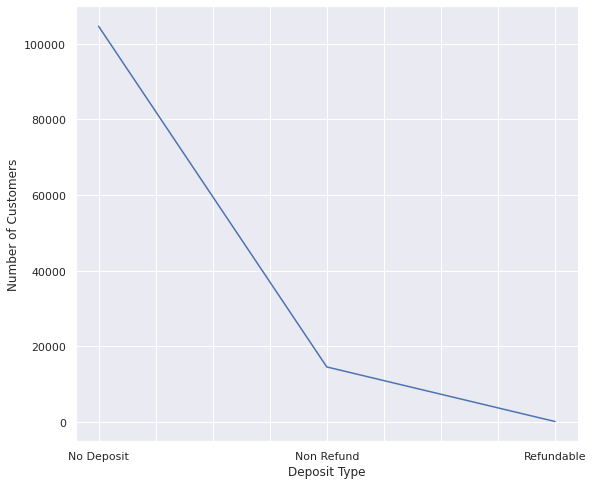

In [24]:
plt.figure(figsize=(9,8))
deposit.plot()
plt.ylabel('Number of Customers')
plt.xlabel('Deposit Type')

From the above graph we came to know about the different deposit status of customers. 